 # Steps in Machine Learning and model building
    1- Data Preprocessing
    2- train test data
    3- Algorithm setup
    4- Model fitting
    5- Prediction
    6- Model Evaluate
    7- Model export

# Step-1 Data Processing

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [50]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'

In [51]:
df = pd.read_csv(path)

In [52]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [53]:
a = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [54]:
a.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


# Step-2 Train Test Data 

In [55]:
ndf = np.random.rand(len(df)) < 0.8
train = a[ndf]
test = a[~ndf]

In [56]:
len(train)

859

In [57]:
len(test)

208

In [58]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])    

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


# Step-3 Algorithm Setup

### Polynomial Regression

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
pl = PolynomialFeatures(degree=2)

# Step-4 Model Fit

In [61]:
train_pl = pl.fit_transform(train_x)

In [62]:
train_pl

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$y = b + \theta_1  x_1 + \theta_2 x_2$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems. 



so we can use __LinearRegression()__ function to solve it:

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr = LinearRegression()

In [65]:
lr.fit(train_pl,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
print('Coefficient : ',lr.coef_)

Coefficient :  [[ 0.         47.51395683 -1.18521368]]


In [67]:
print('Intercept : ', lr.intercept_)

Intercept :  [112.77003005]


Text(0, 0.5, 'Emission')

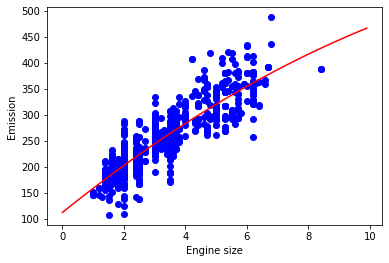

In [68]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = lr.intercept_[0]+ lr.coef_[0][1]*XX+ lr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

# Step-5 Prediction

In [70]:
test_pl_x = pl.fit_transform(test_x)

In [72]:
yhat = lr.predict(test_pl_x)

In [73]:
yhat[0:5]

array([[219.97669562],
       [264.55001133],
       [309.90425687],
       [351.84508701],
       [203.05708898]])

# Step-6 Evaluation

In [75]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(yhat , test_y) )

Mean absolute error: 23.84
Residual sum of squares (MSE): 1017.12
R2-score: 0.63
